# CS 5683 - Big Data Analytics
## Project - 3: $k$-means++ clustering*
### Suraj Pawar, Pankajdeer Bikumalla

In [ ]:
!pip install pyspark

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import os
import shutil
import sys
from operator import add
import itertools
import numpy as np
import random
import time as time
from pyspark import SparkContext
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker

font = {'size'   : 18}    
plt.rc('font', **font)

import matplotlib as mpl


In [ ]:
# initialize the spark context
sc = SparkContext(appName="Spark Apriori")

ValueError: ignored

In [ ]:
path = "/content/drive/My Drive/Coursework/CS 5683_Big_Data/Project-3/data.txt"
# path = "/content/drive/My Drive/3Sem/CS5683/Projects/Project 3/data.txt"

data = np.genfromtxt(path)
n_examples, n_features = data.shape

num_clusters = 10 # number of clusters
max_iterations = 20 # maximum number of iterations

In [ ]:
# import the data
data_rdd = sc.textFile(path,2)
# data_rdd = sc.parallelize(data,2)

# count the total number of baskets
print('Total number of examples = ', data_rdd.count())

datafloat = data_rdd.map(lambda line: ([float(item) for item in line.strip().split(' ')]))
datazipped = datafloat.zipWithIndex().map(lambda x: (x[1],x[0]))

for val in datazipped.take(2):
  print(val)

Total number of examples =  4601
(0, [0.0, 0.64, 0.64, 0.0, 0.32, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.0, 0.0, 0.0, 0.32, 0.0, 1.29, 1.93, 0.0, 0.96, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.778, 0.0, 0.0, 3.756, 61.0, 278.0, 1.0])
(1, [0.21, 0.28, 0.5, 0.0, 0.14, 0.28, 0.21, 0.07, 0.0, 0.94, 0.21, 0.79, 0.65, 0.21, 0.14, 0.14, 0.07, 0.28, 3.47, 0.0, 1.59, 0.0, 0.43, 0.43, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.132, 0.0, 0.372, 0.18, 0.048, 5.114, 101.0, 1028.0, 1.0])


In [ ]:
centroids = sc.parallelize(datazipped.takeSample(False, 1))

In [ ]:
# test code:
def compute_farthest_centroid(x):
  p = np.array(x[1])
  max_dist = -np.inf
  for item in centroids_broadcast.value:
    idx = item[0]
    p_centroid = np.array(item[1])
    dist = (np.linalg.norm(p - p_centroid))**2
    if dist > max_dist:
      max_dist = dist
      farthest_centroid = idx
  
  return (x[0],  max_dist)


def compute_closest_centroid(x):
  p = np.array(x[1])
  max_dist = np.inf
  for item in centroids_broadcast.value:
    idx = item[0]
    p_centroid = np.array(item[1])
    dist = np.linalg.norm(p - p_centroid)
    if dist < max_dist:
      max_dist = dist**2
      farthest_centroid = idx
  
  return (x[0],  max_dist)

def centroids_filter(x):
  if x[0] in centroids_broadcast_keys.value:
    return ()
  else:
    return x

centroids = sc.parallelize(datazipped.takeSample(False, 1))
centroids_broadcast = sc.broadcast(centroids.collect())

centroids_broadcast_keys = sc.broadcast(centroids.keys().collect())

k = 1
while k < num_clusters:
  data_f = datazipped.map(centroids_filter).filter(lambda x: x)

  farthest_centroids_data = data_f.map(lambda x: compute_farthest_centroid(x))
  # farthest_centroids_data = data_f.map(lambda x: compute_closest_centroid(x))

  value_sum = farthest_centroids_data.map(lambda x : x[1]).sum()

  farthest_centroids_data = farthest_centroids_data.map(lambda x : (x[0], x[1]/value_sum))

  lk = farthest_centroids_data.keys().collect()
  lv = farthest_centroids_data.values().collect()

  # print(len(lk), ' ', len(lv))
  R = np.random.choice(lk, 1, p=lv)

  new_centroid = data_f.filter(lambda x : x[0] == R)

  centroids = centroids.union(new_centroid)

  centroids_broadcast = sc.broadcast(centroids.collect())
  centroids_broadcast_keys = sc.broadcast(centroids.keys().collect())

  k = k + 1

# centroids.saveAsTextFile('init_centroids_kmeanspp.txt')

for item in centroids.collect():
  print(item)

(2804, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 4.0, 6.0, 0.0])
(1753, [0.0, 0.0, 0.0, 0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.0, 0.0, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.024, 9.752, 0.003, 1.542, 1.785, 1.998, 239.571, 9989.0, 10062.0, 1.0])
(4577, [0.0, 0.0, 1.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.61, 0.0, 2.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2, 3.0, 24.0, 0.0])
(2403, [0.72, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.45, 0.0,

In [ ]:
# printing the k-centroids
print("Initial k-centroids of K-means++: ")
print('\n')
for item in centroids.collect():
  print(item)

Initial k-centroids of K-means++: 


(2804, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 4.0, 6.0, 0.0])
(1753, [0.0, 0.0, 0.0, 0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.0, 0.0, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.024, 9.752, 0.003, 1.542, 1.785, 1.998, 239.571, 9989.0, 10062.0, 1.0])
(4577, [0.0, 0.0, 1.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.61, 0.0, 2.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2, 3.0, 24.0, 0.0])
(2403, [0.72, 0.0, 0.0, 0.0, 0.0, 0.0

In [ ]:
#Function to calculate euclidean distance
def calculate_distance_euclidien(centroid, data_element):
    centroid_features = np.array(centroid[1])
    data_element_features = np.array(data_element[1])
    distance = np.linalg.norm(centroid_features - data_element_features)
    return (data_element[0], (centroid[0], distance))

#function: computing manhattan distance
def calculate_distance_manhattan(centroid, data_element):
    centroid_features = np.array(centroid[1])
    data_element_features = np.array(data_element[1])
    distance = np.sqrt(np.sum(np.abs(centroid_features - data_element_features)))
    return (data_element[0], (centroid[0], distance))

def min_distance(row):
    element_index = row[0]
    centroids_distances_list = row[1]
    minimum_distance = -1
    closest_centroid = None
    min_centroid_index = -1
    for item in centroids_distances_list:
        centroid_index = item[0]
        distance = item[1]
        if (minimum_distance == -1) or (distance < minimum_distance):
            minimum_distance = distance
            min_centroid_index = centroid_index
            closest_centroid = (min_centroid_index, minimum_distance)
    return (element_index, closest_centroid)


# function to assign closest centroid: Euclidean approach
def assign_cluster_euclidean(centroids, data):
  centroids_data = centroids.cartesian(data)
  data_centroids_distances = centroids_data.map(lambda x: calculate_distance_euclidien(x[0], x[1]))
  data_assignedto_closest_cluster = data_centroids_distances.groupByKey().map(lambda x: (x[0], list(x[1]))).map(lambda x: min_distance(x))

  return data_assignedto_closest_cluster

# function to assign closest centroid: Manhattan approach
def assign_cluster_manhattan(centroids, data):
  centroids_data = centroids.cartesian(data)
  data_centroids_distances = centroids_data.map(lambda x: calculate_distance_manhattan(x[0], x[1]))
  data_assignedto_closest_cluster = data_centroids_distances.groupByKey().map(lambda x: (x[0], list(x[1]))).map(lambda x: min_distance(x))

  return data_assignedto_closest_cluster


In [ ]:
# Function to update Centroids:in each iteration for improving cost function 
def compute_new_centroid(centroid_index, cluster_elements):
    all_cluster_elements = []
    for element in cluster_elements:
        all_cluster_elements.append(element[0])
    averageArray = list(np.average(all_cluster_elements, axis = 0))
    new_centroid = (centroid_index, averageArray)
    return new_centroid

def compute_new_centroids(dataMinDistance):
  dataByCluster = dataMinDistance.join(datazipped).map(lambda x: (x[1][0][0], (x[1][1], x[1][0][1])))
  dataByCluster = dataByCluster.groupByKey().map(lambda x: (x[0], list(x[1])))
  newCentroids = dataByCluster.map(lambda x: compute_new_centroid(x[0], x[1]))    
  return newCentroids


## Euclidean distance approach

In [ ]:
#using euclidean approach
iterations = 0

# storing iteration number and computation cost in each iteration
results_euclidean = np.zeros((max_iterations,2))

#getting the computation times in each iteration
start = time.time()

# initialized centroids
centroids_eucli = centroids

# performing 20 iterations as given
while iterations < max_iterations:
  iterations += 1

  # assign each data element to closest cluster
  data_assignedto_closest_cluster =  assign_cluster_euclidean(centroids_eucli, datazipped)

  # compute new centroid
  new_centroids_eucli = compute_new_centroids(data_assignedto_closest_cluster)
  
  # compute cost function
  assigned_clusters = data_assignedto_closest_cluster.map(lambda x : (x[1][1])**2)
  cost_eucli = assigned_clusters.sum()

  # print the cost function
  print('iteration # %.1d : %.3f' %(iterations, cost_eucli))

  # store the cost function for plotting
  results_euclidean[iterations-1,:] = np.array([iterations, cost_eucli])


  # update centroid with the new centroid
  centroids_eucli = sc.parallelize(new_centroids_eucli.collect())

print('Total CPU time = %.3f' %(time.time() - start))

iteration # 1 : 1365548370.498
iteration # 2 : 655595668.896
iteration # 3 : 499734409.922
iteration # 4 : 428018035.520
iteration # 5 : 385052177.693
iteration # 6 : 352849899.972
iteration # 7 : 335797603.565
iteration # 8 : 324455800.687
iteration # 9 : 302763129.962
iteration # 10 : 268989971.557
iteration # 11 : 247616195.502
iteration # 12 : 237321076.329
iteration # 13 : 233122080.628
iteration # 14 : 229372402.757
iteration # 15 : 226038865.049
iteration # 16 : 223733175.546
iteration # 17 : 221253933.810
iteration # 18 : 218325055.587
iteration # 19 : 215592661.622
iteration # 20 : 212801474.404
Total CPU time = 58.695


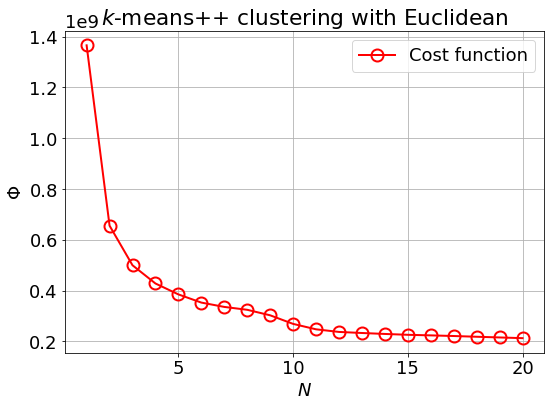

In [ ]:
# Eucledian Distance plotting
fig, axs = plt.subplots(1,1,figsize=(8,6))

axs.plot(results_euclidean[:,0], results_euclidean[:,-1], 'ro-', lw=2, ms=12, mew=2, fillstyle='none',  label='Cost function')
# axs[0].plot(results[:,0], results[:,1], 'bo-', label='Intra-cluster distance')

axs.grid()
axs.set_xlabel('$N$')
axs.set_ylabel('$\Phi$')
axs.legend(loc=0)
# axs[0].set_ylim(1e-8,1e0)
axs.set_title('$k$-means++ clustering with Euclidean')

fig.tight_layout()
plt.show()

**Observations:** <br>
From the above plot, we can observe that <br>
- Cost function follows decreasing trend till the last iteration
- Cost values dropped significantly within first 7 iterations significantly and then values kept decreasing slowly
- Cost function values seemed to have reached almost saturation after 18th iteration

In [ ]:
# percentage change in cost function
percent_change_eucli = np.abs(results_euclidean[0,-1]-results_euclidean[9,-1])/results_euclidean[0,-1]
print("Percentage change in cost function for 10th iteration - Euclidean distance method ", round(100*percent_change_eucli,2), "%")

Percent change in cost function for 10th iteration - Euclidean distance method  80.3 %


## Manhattan distance method


In [ ]:

#using manhattan approach
iterations = 0
# storing iteration number and computation cost in each iteration
results_mann = np.zeros((max_iterations,2))

#getting the computation times in each iteration
start = time.time()

#initialized centroids
centroids_mann = centroids

# performing 20 iterations as given
while iterations < max_iterations:
  iterations += 1

  # assign each data element to closest cluster
  data_assignedto_closest_cluster =  assign_cluster_manhattan(centroids_mann, datazipped)

  # compute new centroid
  new_centroids_mann = compute_new_centroids(data_assignedto_closest_cluster)

  # compute cost function
  assigned_clusters = data_assignedto_closest_cluster.map(lambda x : x[1][1]**2)
  cost_mann = assigned_clusters.sum()

  # print the cost function
  print('iteration # %.1d : %.3f' %(iterations, cost_mann))

  # store the cost function for plotting
  results_mann[iterations-1,:] = np.array([iterations, cost_mann])


  # update centroid with the new centroid
  centroids_mann = sc.parallelize(new_centroids_mann.collect())

print('Total CPU time = %.3f' %(time.time() - start))


iteration # 1 : 1018219.730
iteration # 2 : 741286.184
iteration # 3 : 671497.965
iteration # 4 : 645223.493
iteration # 5 : 625135.815
iteration # 6 : 610190.670
iteration # 7 : 593853.444
iteration # 8 : 574594.981
iteration # 9 : 546070.946
iteration # 10 : 523597.433
iteration # 11 : 507083.920
iteration # 12 : 494999.939
iteration # 13 : 486433.927
iteration # 14 : 482128.804
iteration # 15 : 476790.316
iteration # 16 : 473798.328
iteration # 17 : 466332.865
iteration # 18 : 460173.719
iteration # 19 : 453788.002
iteration # 20 : 450850.582
Total CPU time = 54.960


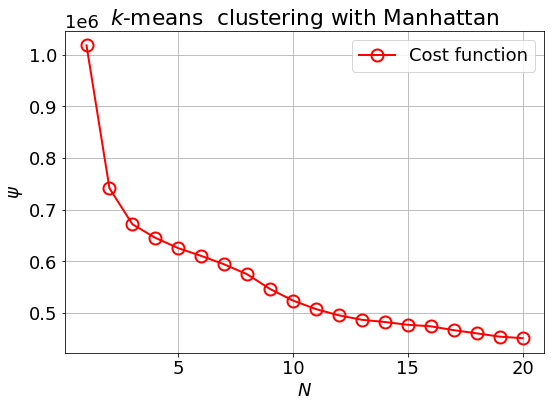

In [ ]:
# Manhattan Distance plotting
fig, axs = plt.subplots(1,1,figsize=(8,6))

axs.plot(results_mann[:,0], results_mann[:,-1], 'ro-', lw=2, ms=12, mew=2, fillstyle='none',  label='Cost function')

axs.grid()
axs.set_xlabel('$N$')
axs.set_ylabel('$\psi$')
axs.legend(loc=0)
# axs[0].set_ylim(1e-8,1e0)
axs.set_title('$k$-means  clustering with Manhattan')

fig.tight_layout()
plt.show()



**Observations:** <br>
From the above plot, we can observe that <br>
- Cost function follows decreasing trend till 13th iteration
- Cost values dropped significantly within first 5 iterations significatly and then values kept decreasing slowly and reached an minimum value at 13 iteration approximately
- The cost function values increased after 13th iteration till 20th iteration

In [ ]:
# percentage change in cost function for 10th iteration
percent_change_mann = np.abs(results_mann[0,-1]-results_mann[9,-1])/results_mann[0,-1]
print("Percentage change in cost function for 10th iteration - Manhattan distance method ", round(100*percent_change_mann,2), "%")

Percent change in cost function for 10th iteration - Manhattan distance method  48.58 %


### Cost Function iteration comparision
#### 1. $k$-means:
Percentage change in cost function values: <br>
- Euclidean distance method: 53.38%
- Manhattan distance method: 43.60%

Time taken to execute:
- Euclidean distance method: 53 seconds
- Manhattan distance method: 57 seconds
<br>

#### 2. $k$-means++:
Percentage change in cost function values: <br>
- Euclidean distance method: 80.3%
- Manhattan distance method: 48.58%

Time taken to execute:
- Euclidean distance method: 45 seconds
- Manhattan distance method: 47 seconds
<br>

**Inference:** 
- From the above values we can observe that, $k$-means++ is performing better at 10th iteration i.e. $k$-means++ is moving to optimal position quicker than $k$-means.
- The percentage reduction in cost for $k$-means++ is more, especially, for the Euclidien distance cost function. This is due to the fact that the initialization of centrods in $k$-means++ clustering approach is based on maximizing the distance between two centroids. However, in case of the $k$-means approach, initial centroids are chosen randomly.  


## Team Participation and Contribution:
- As a team we discussed the approach and logic to perform clustering and the way to achieve optimal centroids after 20 iterations
- Together we also discussed the flow of program to main the uniformity of coding in both kmeans and kmeans++

Suraj:
- Implemented the logic for euclidean distance appraoch
- Completed the program implementation and execution for kmeans
- Developed visulizations for plotting cost function values in each iteration

Pankajdeer:
- Implemented the logic for manhattan distance appraoch
- Completed the program implementation and execution for kmeans
- Performed cost function comparision analysis in both the approaches 
<br>
At the end, we brought uniformity in implementation for both $k$-means and $k$-means++ clustering approaches and cross validated the approaches/steps taken to find out the mistakes.

- Overall, its a wonderful experience working together as a group project





# Due Date: Oct. 16 at 11:59pm